In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import os

filepaths = []
# Define the main directory containing subfolders for activation functions
main_directory = "/content/drive/MyDrive/Results/CNN/Non-generalizability/Spectral_Features"  # Replace with the path to your main directory

# Iterate through each folder in the main directory
for folder_name in os.listdir(main_directory):
    folder_path = os.path.join(main_directory, folder_name)

    # Check if the folder_path is a directory
    if os.path.isdir(folder_path):
        # Path to the train_logs.csv file inside the folder
        csv_file_path = os.path.join(folder_path, "train_logs.csv")
        filepaths.append(csv_file_path)

print(filepaths)

['/content/drive/MyDrive/Results/CNN/Non-generalizability/Spectral_Features/LeakyReLU/train_logs.csv', '/content/drive/MyDrive/Results/CNN/Non-generalizability/Spectral_Features/ReLU/train_logs.csv', '/content/drive/MyDrive/Results/CNN/Non-generalizability/Spectral_Features/SwishReLU/train_logs.csv', '/content/drive/MyDrive/Results/CNN/Non-generalizability/Spectral_Features/z^2cos(z)/train_logs.csv', '/content/drive/MyDrive/Results/CNN/Non-generalizability/Spectral_Features/DSU/train_logs.csv', '/content/drive/MyDrive/Results/CNN/Non-generalizability/Spectral_Features/GCU/train_logs.csv', '/content/drive/MyDrive/Results/CNN/Non-generalizability/Spectral_Features/SSU/train_logs.csv']


In [ ]:
df = pd.read_csv(filepaths[0])
df.columns

Index(['Training_Loss', 'Training_Accuracy', 'Validation_Loss'], dtype='object')

In [ ]:
import os
import pandas as pd

dfnames = []  # List to store separate DataFrames for each column

# Read the first file to get the column names (assuming all CSVs have the same columns)
df = pd.read_csv(filepaths[0])
columns = df.columns

# Loop through each column
for j in columns:
    dummy_df = pd.DataFrame()  # Initialize a new DataFrame for each column

    # Loop through each file
    for i in filepaths:
        # Read the CSV file
        df = pd.read_csv(i)

        # Extract activation function name
        activation_function_name = os.path.basename(os.path.dirname(i))

        # Extract the column `j` and rename it
        df_subset = df[[j]].rename(
            columns={j: j + " " + activation_function_name}
        )

        # Concatenate the subset DataFrame into dummy_df
        dummy_df = pd.concat([dummy_df, df_subset], axis=1)

    # Append the resulting dummy_df to dfnames
    dfnames.append(dummy_df)

# Display the resulting DataFrames in dfnames
for idx, df in enumerate(dfnames):
    print(f"DataFrame for column: {columns[idx]}")
    print(df.head())
    print("-" * 50)


DataFrame for column: Training_Loss
   Training_Loss LeakyReLU  Training_Loss ReLU  Training_Loss SwishReLU  \
0                 0.900237            0.896925                 0.899120   
1                 0.797728            0.846276                 0.801902   
2                 0.790248            0.859917                 0.793622   
3                 0.787195            0.700608                 0.790261   
4                 0.785813            0.785783                 0.788489   

   Training_Loss z^2cos(z)  Training_Loss DSU  Training_Loss GCU  \
0                 1.071439           0.868169           0.925210   
1                 0.881998           0.845457           0.802978   
2                 0.844035           0.821008           0.790026   
3                 0.831245           0.808482           0.786583   
4                 0.832103           0.785227           0.784360   

   Training_Loss SSU  
0           0.966194  
1           0.824960  
2           0.803391  
3           

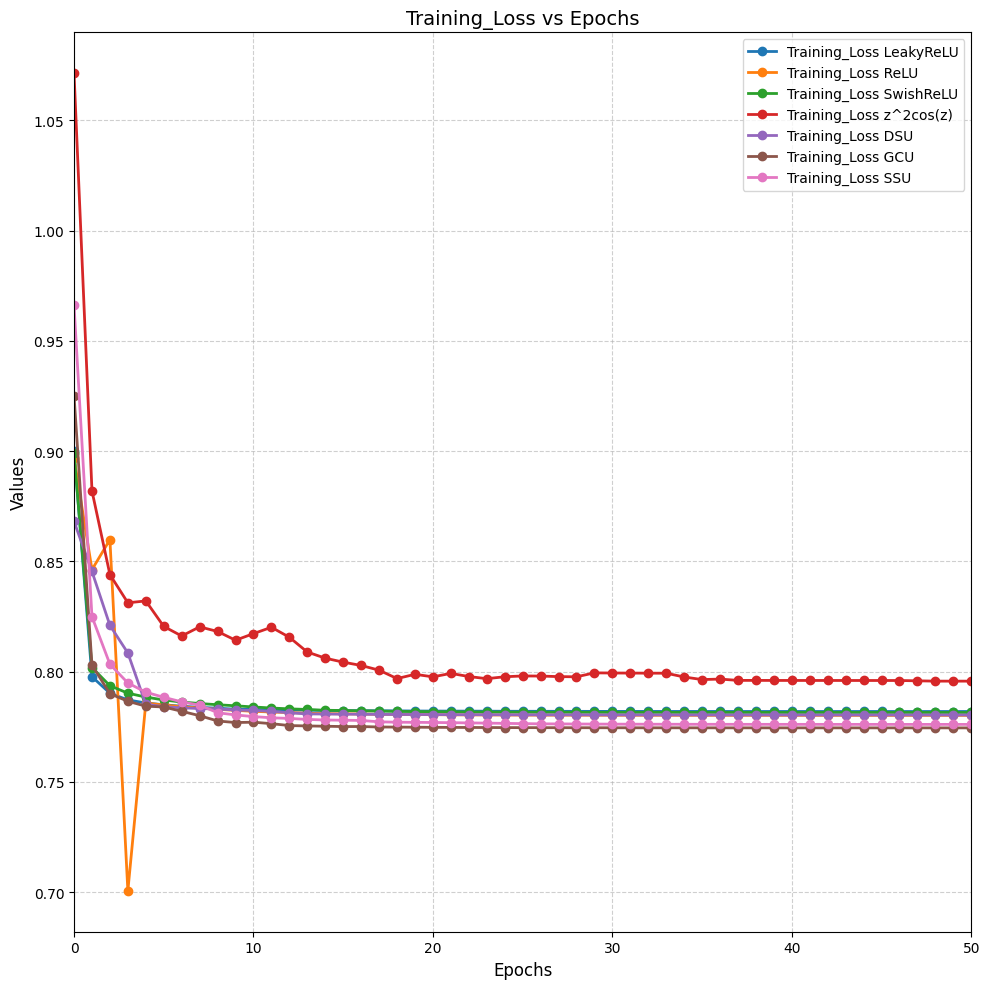

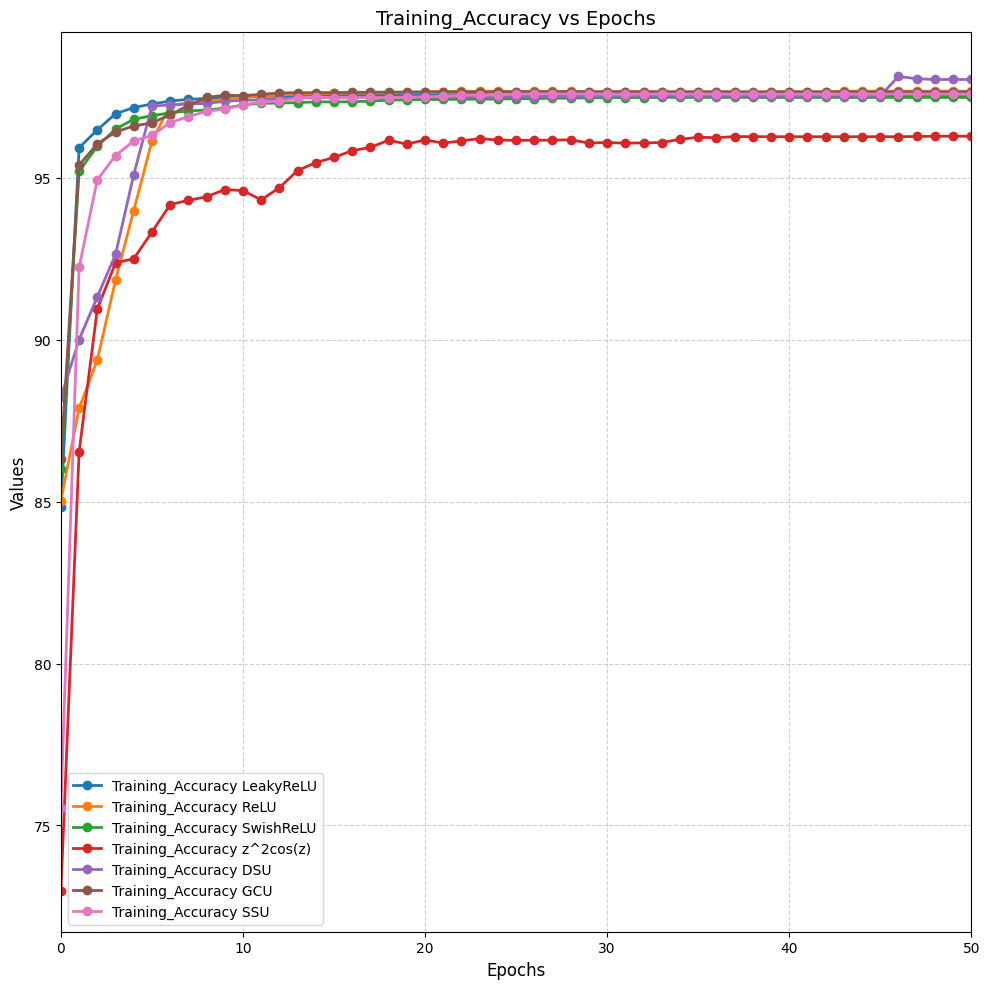

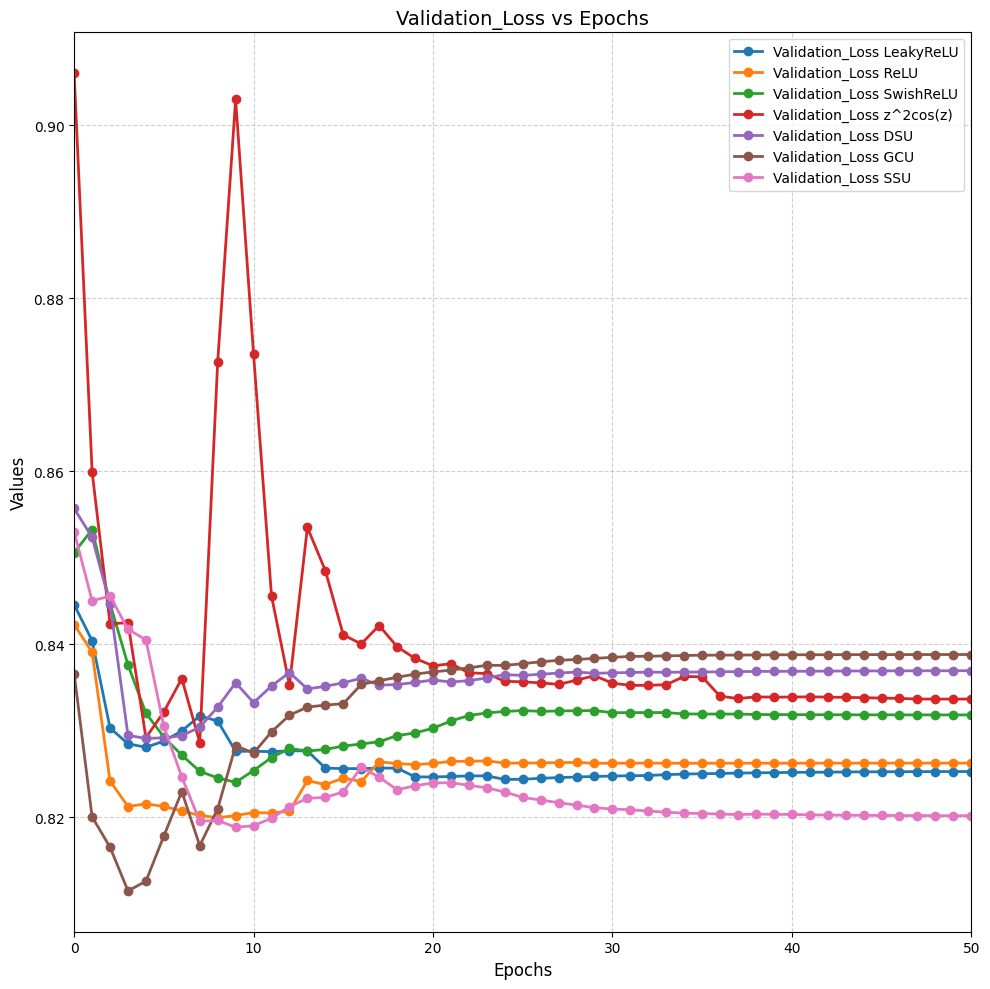

In [ ]:
import matplotlib.pyplot as plt

# Iterate through each DataFrame in dfnames
for idx, df in enumerate(dfnames):
    fig, ax = plt.subplots(figsize=(10, 10))  # Create a new figure for each DataFrame

    # Set title for the entire plot
    ax.set_title(f"{df.columns[0].split()[0]} vs Epochs", fontsize=14)

    # Plot all columns in the current DataFrame
    for i in df.columns:
        ax.plot(df[i], label=i, marker='o', linestyle='-', linewidth=2, markersize=6)   # Plot each column with a label

    # Add legend, labels, and limits
    ax.legend()
    ax.set_xlabel("Epochs", fontsize=12)
    ax.set_ylabel("Values", fontsize=12)
    ax.set_xlim([0, 50])  # Set x-axis limits
    ax.grid(True, linestyle='--', alpha=0.6)

    # Show the plot

    plt.tight_layout()
    x = os.path.basename(os.path.normpath(main_directory))
    new_main_directory = os.path.split(main_directory)
    plt.savefig(f"{new_main_directory[0]}/GRAPHS/{x}/{columns[idx]}.png")

    plt.show()


<Axes: >

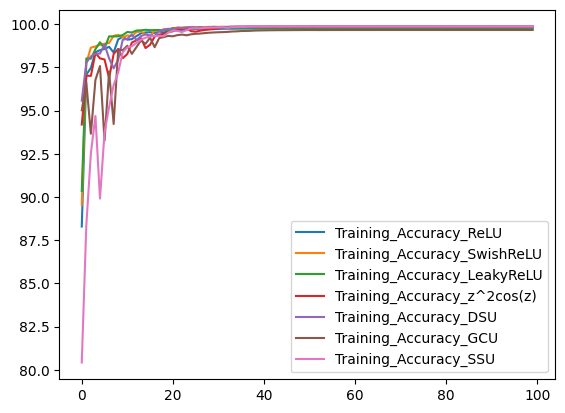

In [ ]:
dummy_df.plot()